In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import joblib
import os

In [4]:
plt.style.use('ggplot')

In [5]:
os.makedirs('../data', exist_ok=True)

print("Environment Ready for Feature Engineering.")

Environment Ready for Feature Engineering.


In [6]:
df = pd.read_csv('../data/cleaned_loans.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (10000, 6)


,income,credit_score,loan_amount,employment_length_years,loan_status,loan_to_income
0,48924.25,582,5000.0,17,1,0.102197
1,33424.40,619,10000.0,31,1,0.299174
2,53562.96,590,5000.0,38,0,0.093346
3,90564.53,661,20000.0,32,0,0.220835
4,31555.65,770,15000.0,25,1,0.475336


In [7]:
bins = [300, 580, 670, 740, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
df['credit_tier'] = pd.cut(df['credit_score'], bins=bins, labels=labels, include_lowest=True)

In [8]:
def cat_emp(years):
    if years < 1: return 'New'
    elif 1 <= years <= 5: return 'Stable'
    else: return 'Long-term'

In [9]:
df['emp_category'] = df['employment_length_years'].apply(cat_emp)

In [10]:
df['high_loan_stress'] = (df['loan_to_income'] > 0.5).astype(int)

print("Risk categories and stress flags created.")

Risk categories and stress flags created.


In [11]:
df['stress_index'] = df['loan_to_income'] / (df['credit_score'] / 850)

In [12]:
stress_corr = df[['stress_index', 'loan_status']].corr().iloc[0, 1]
print(f"Stress Index Correlation with Default: {stress_corr:.4f}")

Stress Index Correlation with Default: 0.4209


In [13]:
df = pd.get_dummies(df, columns=['credit_tier', 'emp_category'], drop_first=True)

In [15]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

print(f"Final Feature Shape: {df.shape}")

Final Feature Shape: (10000, 14)


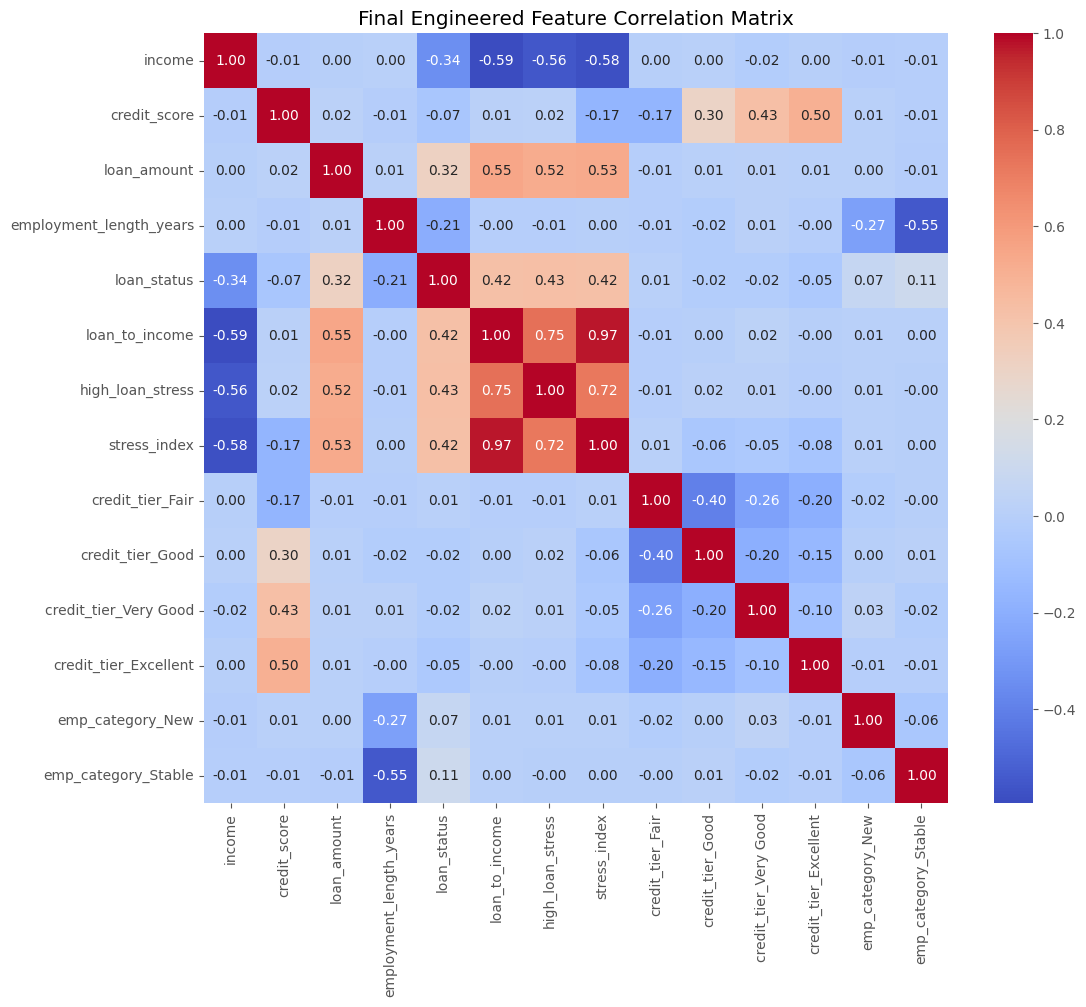

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Final Engineered Feature Correlation Matrix")
plt.show()

In [17]:
df.to_csv('../data/features_final.csv', index=False)
print("Feature Engineering Complete. Ready for Modeling!")

Feature Engineering Complete. Ready for Modeling!
